In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data_test = pd.read_csv("C:/Users/komsv/Downloads/application_test.csv")
data_train = pd.read_csv("C:/Users/komsv/Downloads/application_train.csv")
data = data_train.append(data_test)

In [4]:
print(f"Розмір даних train {data_train.shape}")
print(f"Розмір даних test {data_test.shape}")


print ('Перші 5 рядків даних:') 
data.head ()

Розмір даних train (307511, 122)
Розмір даних test (48744, 121)
Перші 5 рядків даних:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [17]:
#перевірка на 0
print(data.isnull().sum().sort_values(ascending=False)/len(data)*100)

COMMONAREA_AVG                  69.714109
COMMONAREA_MODE                 69.714109
COMMONAREA_MEDI                 69.714109
NONLIVINGAPARTMENTS_AVG         69.293343
NONLIVINGAPARTMENTS_MEDI        69.293343
NONLIVINGAPARTMENTS_MODE        69.293343
FONDKAPREMONT_MODE              68.235393
LIVINGAPARTMENTS_MODE           68.203674
LIVINGAPARTMENTS_MEDI           68.203674
LIVINGAPARTMENTS_AVG            68.203674
FLOORSMIN_MEDI                  67.678489
FLOORSMIN_AVG                   67.678489
FLOORSMIN_MODE                  67.678489
YEARS_BUILD_MODE                66.330578
YEARS_BUILD_AVG                 66.330578
YEARS_BUILD_MEDI                66.330578
OWN_CAR_AGE                     66.031635
LANDAREA_MODE                   59.183450
LANDAREA_AVG                    59.183450
LANDAREA_MEDI                   59.183450
BASEMENTAREA_MODE               58.268375
BASEMENTAREA_MEDI               58.268375
BASEMENTAREA_AVG                58.268375
NONLIVINGAREA_AVG               54

In [11]:
#кореляція з таргетом
correlations = data_train.corr()['TARGET'].sort_values()
print(correlations)

EXT_SOURCE_3                   -0.178919
EXT_SOURCE_2                   -0.160472
EXT_SOURCE_1                   -0.155317
DAYS_EMPLOYED                  -0.044932
FLOORSMAX_AVG                  -0.044003
FLOORSMAX_MEDI                 -0.043768
FLOORSMAX_MODE                 -0.043226
AMT_GOODS_PRICE                -0.039645
REGION_POPULATION_RELATIVE     -0.037227
ELEVATORS_AVG                  -0.034199
ELEVATORS_MEDI                 -0.033863
FLOORSMIN_AVG                  -0.033614
FLOORSMIN_MEDI                 -0.033394
LIVINGAREA_AVG                 -0.032997
LIVINGAREA_MEDI                -0.032739
FLOORSMIN_MODE                 -0.032698
TOTALAREA_MODE                 -0.032596
ELEVATORS_MODE                 -0.032131
LIVINGAREA_MODE                -0.030685
AMT_CREDIT                     -0.030369
APARTMENTS_AVG                 -0.029498
APARTMENTS_MEDI                -0.029184
FLAG_DOCUMENT_6                -0.028602
APARTMENTS_MODE                -0.027284
LIVINGAPARTMENTS

In [21]:
#ЗМЕНШУЄМО КІЛЬКІСТЬ ПОТРІБНИХ ДАНИХ
features = [
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_GOODS_PRICE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'CNT_FAM_MEMBERS',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]
reduced_train_data = data_train[features]
features.remove("TARGET")
reduced_test_data = data_test[features]

In [23]:
#ПЕРЕВІРКА НА НУЛЬ ЗМЕНШЕНИХ ДАНИХ
print(reduced_train_data.isnull().sum().sort_values(ascending=False)/len(data)*100)

EXT_SOURCE_3           17.112742
EXT_SOURCE_2            0.185261
AMT_GOODS_PRICE         0.078034
CNT_FAM_MEMBERS         0.000561
DAYS_EMPLOYED           0.000000
DAYS_BIRTH              0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_INCOME_TYPE        0.000000
AMT_CREDIT              0.000000
AMT_INCOME_TOTAL        0.000000
CNT_CHILDREN            0.000000
FLAG_OWN_REALTY         0.000000
FLAG_OWN_CAR            0.000000
CODE_GENDER             0.000000
NAME_CONTRACT_TYPE      0.000000
TARGET                  0.000000
dtype: float64


In [22]:
##ПЕРЕВІРКА НА НУЛЬ ЗМЕНШЕНИХ ДАНИХ test
print(reduced_test_data.isnull().sum().sort_values(ascending=False)/len(data)*100)

EXT_SOURCE_3           2.433089
EXT_SOURCE_2           0.002246
CNT_FAM_MEMBERS        0.000000
DAYS_EMPLOYED          0.000000
DAYS_BIRTH             0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_INCOME_TYPE       0.000000
AMT_GOODS_PRICE        0.000000
AMT_CREDIT             0.000000
AMT_INCOME_TOTAL       0.000000
CNT_CHILDREN           0.000000
FLAG_OWN_REALTY        0.000000
FLAG_OWN_CAR           0.000000
CODE_GENDER            0.000000
NAME_CONTRACT_TYPE     0.000000
dtype: float64


In [24]:
#ЗАПОВНЕННЯ НУЛІВ СЕРЕДНІМИ ЗНАЧЕННЯМИ
reduced_train_data[['EXT_SOURCE_3','EXT_SOURCE_2','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']] = reduced_train_data[['EXT_SOURCE_3','EXT_SOURCE_2','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']].fillna(value=reduced_train_data[['EXT_SOURCE_3','EXT_SOURCE_2','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']].mean())
reduced_test_data[['EXT_SOURCE_3','EXT_SOURCE_2']] = reduced_test_data[['EXT_SOURCE_3','EXT_SOURCE_2']].fillna(value=reduced_test_data[['EXT_SOURCE_3','EXT_SOURCE_2']].mean())

In [25]:
#ДИВИМОСЬ ТИПИ ДАНИХ І ШУКАЄМО КАТЕГОРІАЛЬНІ ДАНІ
print(f"Типи даних {data.dtypes}")

Типи даних SK_ID_CURR                        int64
TARGET                          float64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE              

In [26]:
data.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [27]:
#ПЕРЕВІРКА НА ДУПЛІКАТИ
data[data.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [28]:
#ОПИС ДАНИХ
reduced_test_data.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3
count,48744.000000,4.874400e+04,4.874400e+04,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000
mean,0.397054,1.784318e+05,5.167404e+05,4.626188e+05,-16068.084605,67485.366322,2.146767,0.518021,0.500106
std,0.709047,1.015226e+05,3.653970e+05,3.367102e+05,4325.900393,144348.507136,0.890423,0.181263,0.171825
min,0.000000,2.694150e+04,4.500000e+04,4.500000e+04,-25195.000000,-17463.000000,1.000000,0.000008,0.000527
25%,0.000000,1.125000e+05,2.606400e+05,2.250000e+05,-19637.000000,-2910.000000,2.000000,0.408082,0.399676
50%,0.000000,1.575000e+05,4.500000e+05,3.960000e+05,-15785.000000,-1293.000000,2.000000,0.558728,0.500106
75%,1.000000,2.250000e+05,6.750000e+05,6.300000e+05,-12496.000000,-296.000000,3.000000,0.658480,0.624615
max,20.000000,4.410000e+06,2.245500e+06,2.245500e+06,-7338.000000,365243.000000,21.000000,0.855000,0.882530


In [29]:
reduced_train_data.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,5.383962e+05,-16036.995067,63815.045904,2.152665,5.143927e-01,0.510853
std,0.272419,0.722121,2.371231e+05,4.024908e+05,3.692794e+05,4363.988632,141275.766519,0.910679,1.908550e-01,0.174464
min,0.000000,0.000000,2.565000e+04,4.500000e+04,4.050000e+04,-25229.000000,-17912.000000,1.000000,8.173617e-08,0.000527
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,-19682.000000,-2760.000000,2.000000,3.929737e-01,0.417100
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,4.500000e+05,-15750.000000,-1213.000000,2.000000,5.654672e-01,0.510853
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,-12413.000000,-289.000000,3.000000,6.634218e-01,0.636376
max,1.000000,19.000000,1.170000e+08,4.050000e+06,4.050000e+06,-7489.000000,365243.000000,20.000000,8.549997e-01,0.896010


In [30]:
reduced_train_data.select_dtypes(include=["int64","float64"]).median()

TARGET                   0.000000
CNT_CHILDREN             0.000000
AMT_INCOME_TOTAL    147150.000000
AMT_CREDIT          513531.000000
AMT_GOODS_PRICE     450000.000000
DAYS_BIRTH          -15750.000000
DAYS_EMPLOYED        -1213.000000
CNT_FAM_MEMBERS          2.000000
EXT_SOURCE_2             0.565467
EXT_SOURCE_3             0.510853
dtype: float64

In [31]:
reduced_test_data.select_dtypes(include=["int64","float64"]).median()

CNT_CHILDREN             0.000000
AMT_INCOME_TOTAL    157500.000000
AMT_CREDIT          450000.000000
AMT_GOODS_PRICE     396000.000000
DAYS_BIRTH          -15785.000000
DAYS_EMPLOYED        -1293.000000
CNT_FAM_MEMBERS          2.000000
EXT_SOURCE_2             0.558728
EXT_SOURCE_3             0.500106
dtype: float64

In [32]:
#ПЕРЕТВОРЮЄМО ДАТУ НАРОДЖЕННЯ НА ДОДАТНІ ЗНАЧЕННЯ
reduced_train_data['DAYS_BIRTH'] = abs(data_train['DAYS_BIRTH'])
reduced_test_data['DAYS_BIRTH'] = abs(data_test['DAYS_BIRTH'])

<AxesSubplot:xlabel='TARGET', ylabel='Count'>

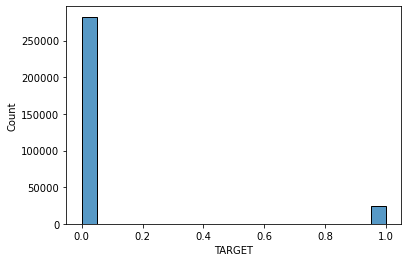

In [33]:
#РОЗПОДІЛИ ДЕЯКИХ КРИТЕРІЇВ
sns.histplot(reduced_train_data['TARGET'])

<AxesSubplot:xlabel='CODE_GENDER', ylabel='Count'>

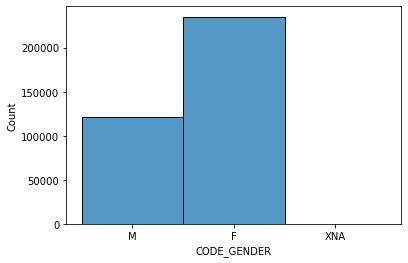

In [34]:
sns.histplot(data['CODE_GENDER'])

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='Count'>

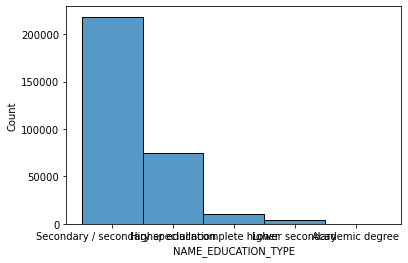

In [35]:
sns.histplot(reduced_train_data['NAME_EDUCATION_TYPE'])

array([[<AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>],
       [<AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>],
       [<AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_2'}>],
       [<AxesSubplot:title={'center':'EXT_SOURCE_3'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

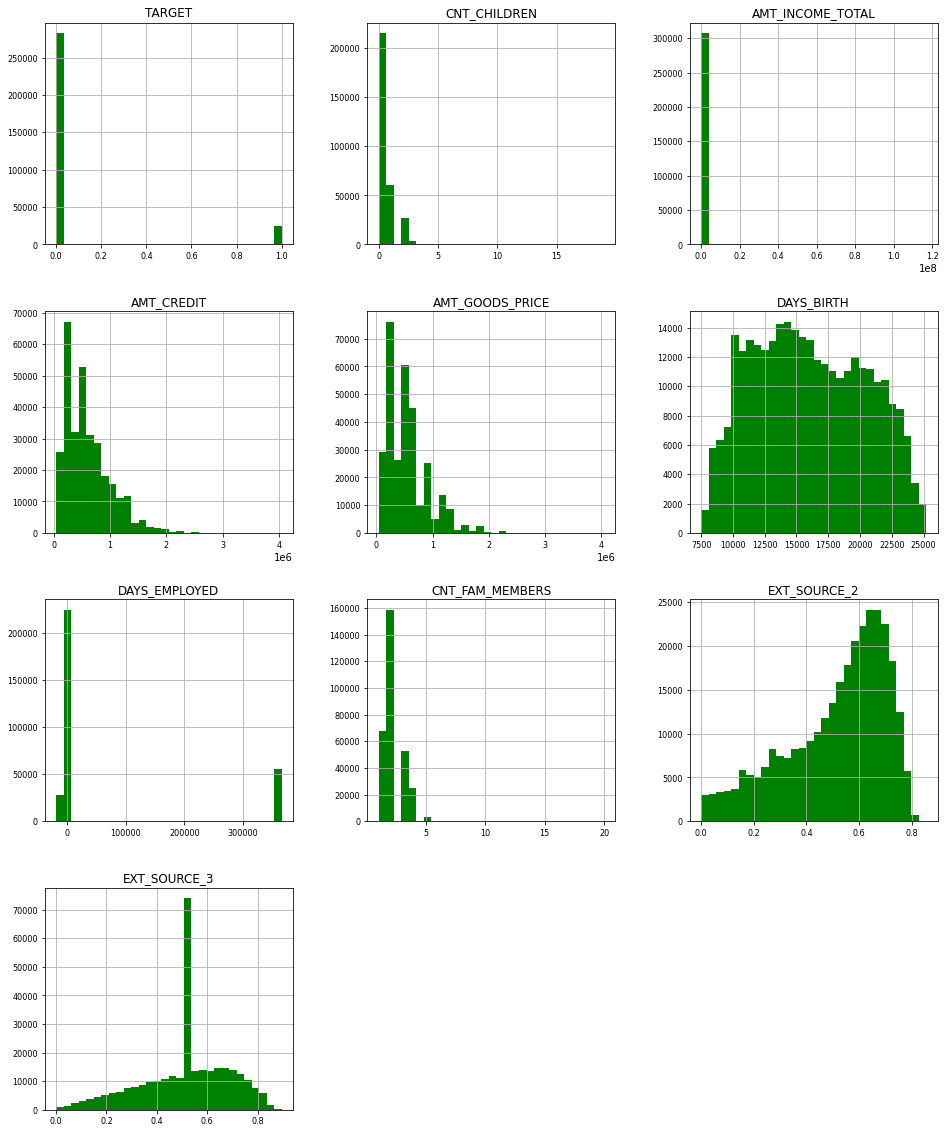

In [36]:
reduced_train_data.hist(figsize=(16, 20), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Count'>

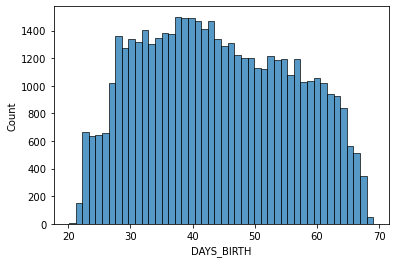

In [40]:
sns.histplot(reduced_test_data["DAYS_BIRTH"]/365)

array([[<AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>],
       [<AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_2'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_3'}>]], dtype=object)

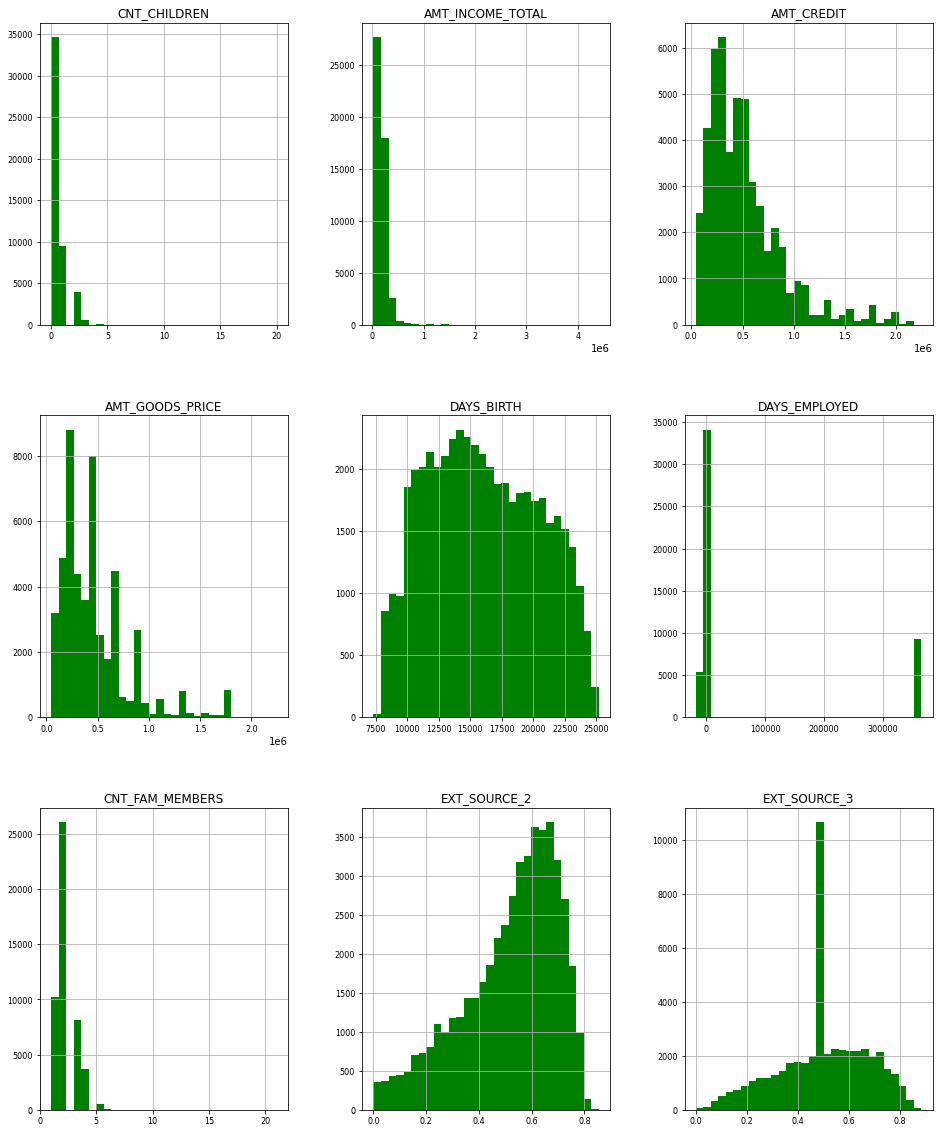

In [41]:
reduced_test_data.hist(figsize=(16, 20), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

In [42]:
#ПЕРЕТВОРЕННЯ ДЕЯКИХ КРИТЕРІЇВ В КАТЕГОРІЇ
categorial_features= ["NAME_EDUCATION_TYPE"]
reduced_train_data["NAME_EDUCATION_TYPE"] = reduced_train_data["NAME_EDUCATION_TYPE"].astype('category').cat.codes
reduced_test_data["NAME_EDUCATION_TYPE"] = reduced_test_data["NAME_EDUCATION_TYPE"].astype('category').cat.codes

In [43]:
reduced_train_data = pd.get_dummies(reduced_train_data)
reduced_test_data = pd.get_dummies(reduced_test_data)
reduced_train_data.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working
0,1,0,202500.0,406597.5,351000.0,4,9461,-637,1.0,0.262949,0.139376,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
1,0,0,270000.0,1293502.5,1129500.0,1,16765,-1188,2.0,0.622246,0.510853,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0
2,0,0,67500.0,135000.0,135000.0,4,19046,-225,1.0,0.555912,0.729567,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,0,0,135000.0,312682.5,297000.0,4,19005,-3039,2.0,0.650442,0.510853,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,0,0,121500.0,513000.0,513000.0,4,19932,-3038,1.0,0.322738,0.510853,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1


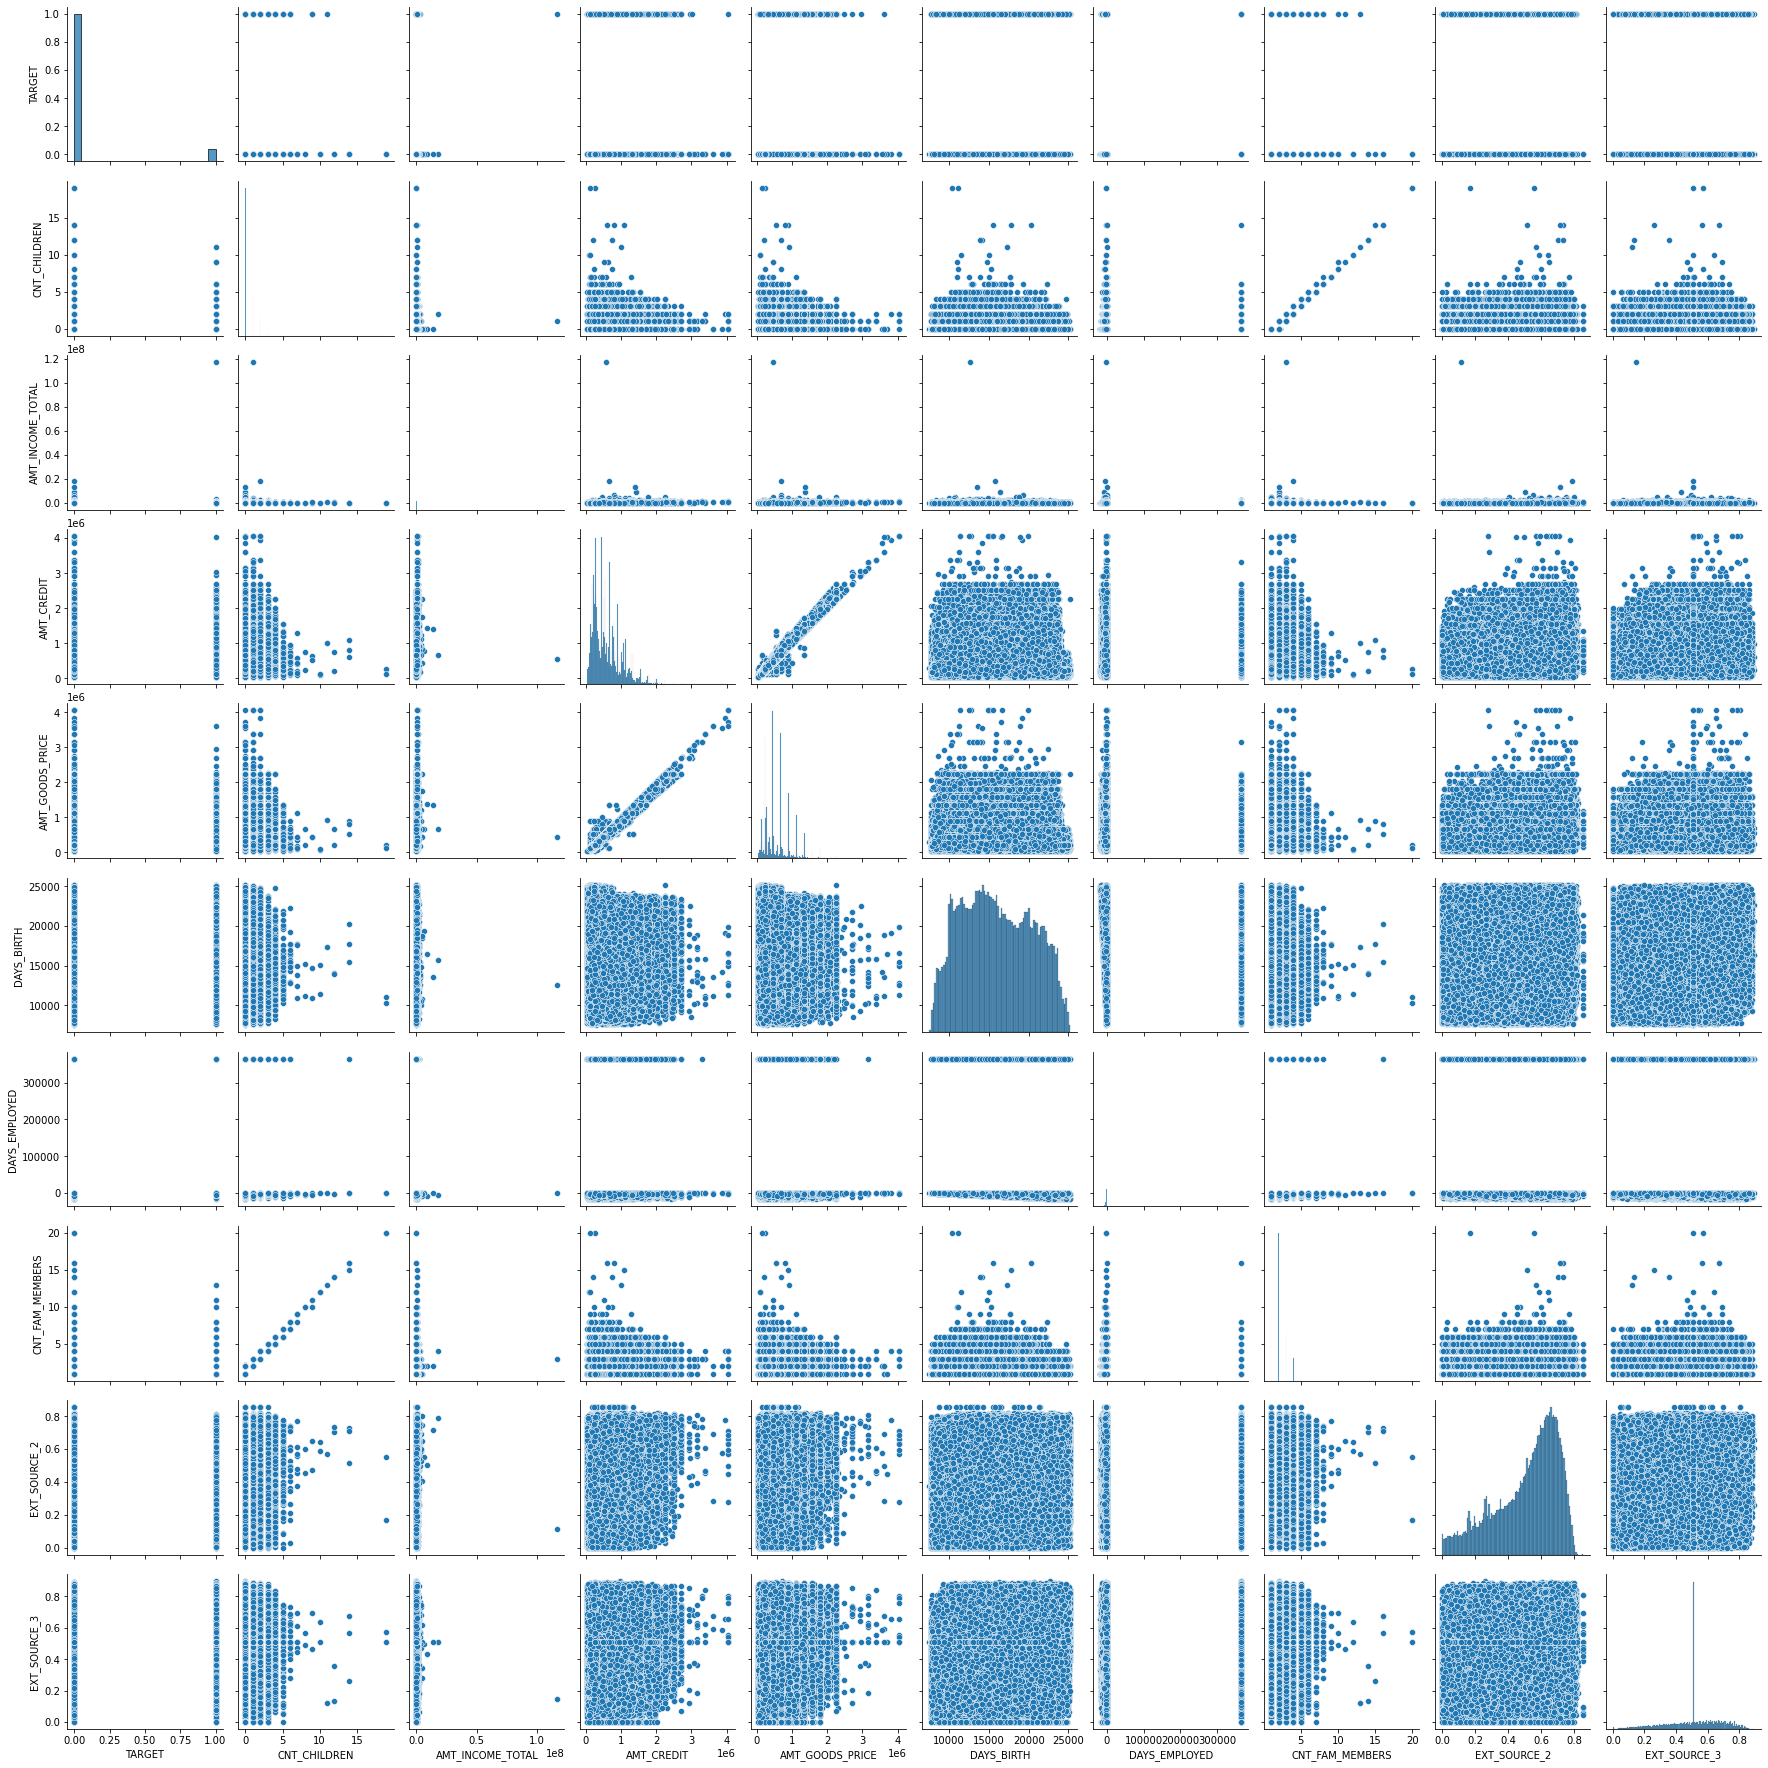

In [44]:
sns.pairplot(reduced_train_data.select_dtypes(include=["int64","float64"]))

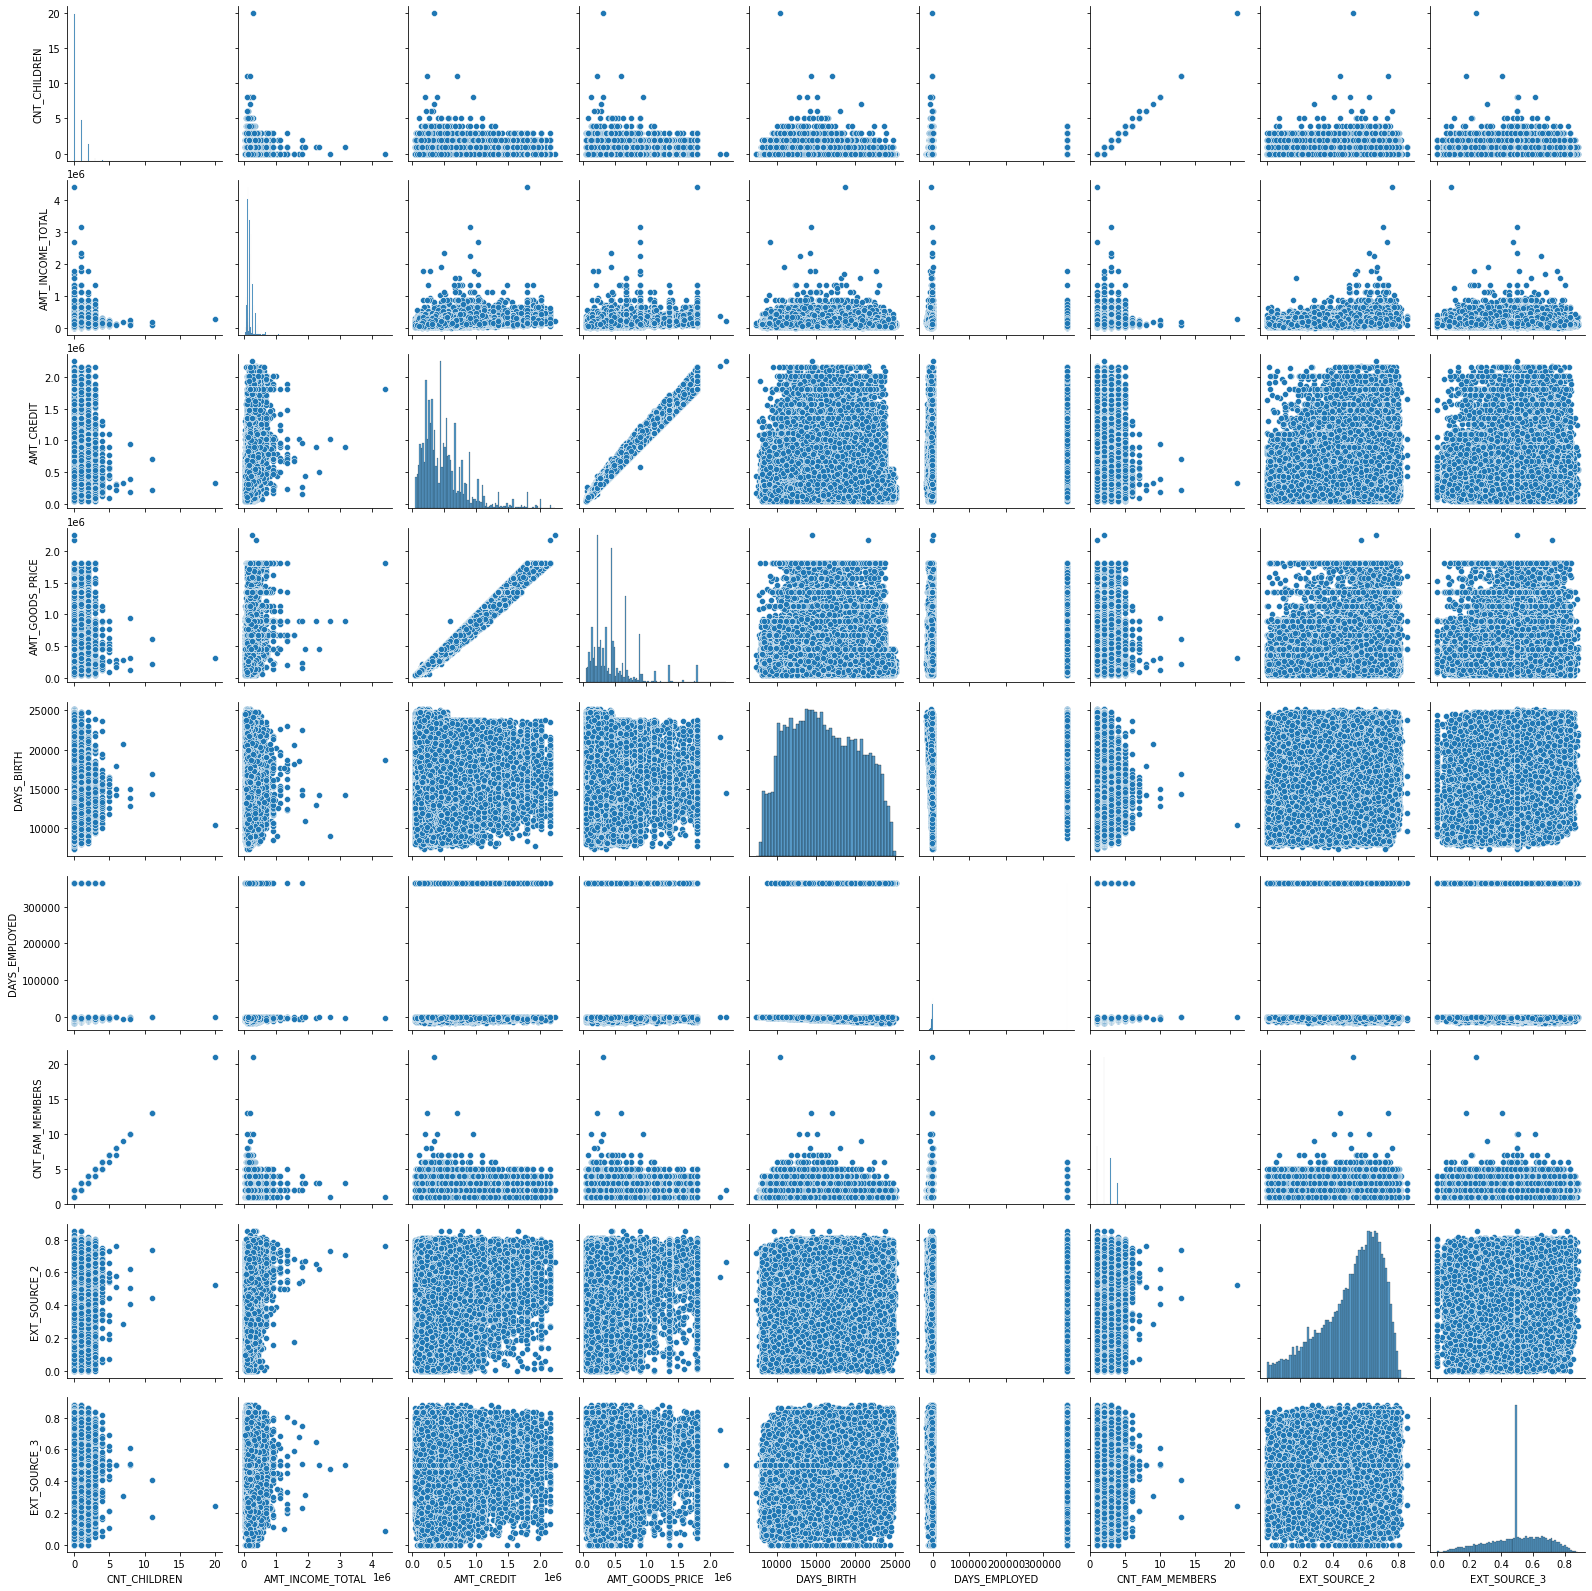

In [45]:
sns.pairplot(reduced_test_data.select_dtypes(include=["int64","float64"]))

In [46]:
final_train_data=reduced_train_data[reduced_test_data.columns]

In [50]:
!pip install lightgbm

Train Accuracy: 0.9199904068160385
Test Accuracy: 0.9195648992732062
train:ROC AUC=0.774
test:ROC AUC=0.742


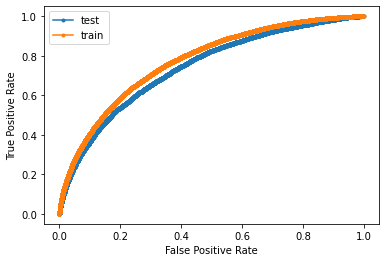

In [54]:
from lightgbm import LGBMClassifier #фреймворк для знаходження градієнта
from sklearn.model_selection import train_test_split #утиліта для розбиття на випадкові підмножини
import numpy as np
import pandas as pd 
from sklearn.metrics import accuracy_score #оціна точності
from sklearn.metrics import roc_curve #для обчислення робочої характеристики приймача (ROC).
from sklearn.metrics import roc_auc_score #для обчислення площі під кривою робочих характеристик приймача (ROC AUC) за оцінками прогнозів
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

data_test = pd.read_csv("C:/Users/komsv/Downloads/application_test.csv")
data_train = pd.read_csv("C:/Users/komsv/Downloads/application_train.csv")

features = [
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_GOODS_PRICE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'CNT_FAM_MEMBERS',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]

reduced_train_data = data_train[features]
features.remove("TARGET")
reduced_test_data = data_test[features]

reduced_train_data[['EXT_SOURCE_3','EXT_SOURCE_2','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']] = reduced_train_data[['EXT_SOURCE_3','EXT_SOURCE_2','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']].fillna(value=reduced_train_data[['EXT_SOURCE_3','EXT_SOURCE_2','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']].mean())
reduced_test_data[['EXT_SOURCE_3','EXT_SOURCE_2']] = reduced_test_data[['EXT_SOURCE_3','EXT_SOURCE_2']].fillna(value=reduced_test_data[['EXT_SOURCE_3','EXT_SOURCE_2']].mean())
reduced_train_data['DAYS_BIRTH'] = abs(data_train['DAYS_BIRTH'])
reduced_test_data['DAYS_BIRTH'] = abs(data_test['DAYS_BIRTH'])

categorial_features= ["NAME_EDUCATION_TYPE"]
reduced_train_data["NAME_EDUCATION_TYPE"] = reduced_train_data["NAME_EDUCATION_TYPE"].astype('category').cat.codes
reduced_test_data["NAME_EDUCATION_TYPE"] = reduced_test_data["NAME_EDUCATION_TYPE"].astype('category').cat.codes
reduced_train_data = pd.get_dummies(reduced_train_data)
reduced_test_data = pd.get_dummies(reduced_test_data)
final_train_data=reduced_train_data[reduced_test_data.columns]
len(final_train_data.columns)

train_x, test_x, train_y, test_y = train_test_split(final_train_data, reduced_train_data["TARGET"], test_size=0.2)

clf = LGBMClassifier()
clf.fit(train_x, train_y)
train_preds = clf.predict(train_x)
print(f"Train Accuracy: {accuracy_score(train_y, train_preds)}")
test_preds = clf.predict(test_x)
print(f"Test Accuracy: {accuracy_score(test_y, test_preds)}")


probabilities = clf.predict_proba(reduced_test_data)
pd.DataFrame({
    'SK_ID_CURR': data_test['SK_ID_CURR'],
    'TARGET':     [ row[1] for row in probabilities]
}).to_csv('C:/Users/komsv/Downloads/sample_submission.csv',index=False)
test_preds = clf.predict_proba(test_x)
test_preds = test_preds[:, 1]
train_preds = clf.predict_proba(train_x)
train_preds = train_preds[:, 1]
lr_auc = roc_auc_score(test_y, test_preds)
tr_auc = roc_auc_score(train_y, train_preds)
print('train:ROC AUC=%.3f' % (tr_auc))
print('test:ROC AUC=%.3f' % (lr_auc))
tr_fpr, tr_tpr, _ = roc_curve(train_y, train_preds)

lr_fpr, lr_tpr, _ = roc_curve(test_y, test_preds)
plt.plot(lr_fpr, lr_tpr, marker='.', label='test')
plt.plot(tr_fpr, tr_tpr, marker='.', label='train')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()